In [1]:
import pandas as pd
import numpy as np

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from gensim import corpora, models

from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel

C:\Users\Vicente\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [87]:
import plotly.graph_objects as go

In [117]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv', index_col='id')
df_final=pd.read_csv('df_final.csv', index_col='id')

In [106]:
df_final=pd.read_csv('df_final.csv', index_col='id')

C:\Users\Vicente\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [72]:
train_clean=train.loc[train.target==0]

In [77]:
train_hate=train.loc[train.target!=0]
hateSize=train_hate.shape[0]

In [81]:
train_clean=train_clean.sample(hateSize)
frames=[train_clean,train_hate]
train = pd.concat(frames).sample(frac=1)
train.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
530839,0.0,Oh really?,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,148545,approved,0,0,0,1,0,0.0,0,4
5748613,0.0,Off point as usual.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,365226,approved,0,0,0,3,4,0.0,4,4
578912,0.2,Ummm....I'm the one who gave you that citation...,0.0,0.0,0.0,0.2,0.0,NaN,NaN,NaN,...,150553,approved,0,0,0,1,0,0.0,0,5
5752481,0.2,"Uh-huh.\n\nI didn't say he used ""all caps"" for...",0.0,0.0,0.0,0.2,0.0,NaN,NaN,NaN,...,365154,approved,0,0,0,0,0,0.0,0,5
5335441,0.0,An exercise. Write your name backwards in cur...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,339141,approved,0,0,0,0,0,0.0,0,4


In [84]:
train.shape[0]

1080220

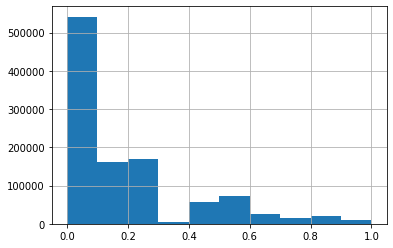

In [91]:
train.target.hist()

In [101]:
train['target_dis']=np.where(train.target==0, 0, 1)
#train=train.drop('train_dis', axis=1)

In [105]:
train.to_csv('df_final.csv')

In [102]:
train.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,target_dis
id,,,,,,,,,,,,,,,,,,,,,
530839,0.0,Oh really?,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,4,0
5748613,0.0,Off point as usual.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,approved,0,0,0,3,4,0.0,4,4,0
578912,0.2,Ummm....I'm the one who gave you that citation...,0.0,0.0,0.0,0.2,0.0,NaN,NaN,NaN,...,approved,0,0,0,1,0,0.0,0,5,1
5752481,0.2,"Uh-huh.\n\nI didn't say he used ""all caps"" for...",0.0,0.0,0.0,0.2,0.0,NaN,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,5,1
5335441,0.0,An exercise. Write your name backwards in cur...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,approved,0,0,0,0,0,0.0,0,4,0


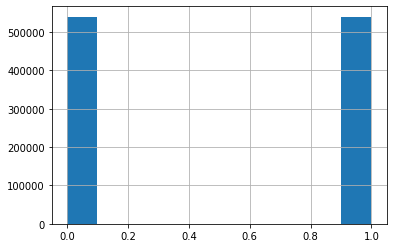

In [103]:
train.target_dis.hist()

In [67]:
### Preprocess

In [107]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(token)
    return result

In [108]:
preprocessed_comments = df_final['comment_text'].sample(1000).map(preprocess)

In [125]:
preprocessed_comments.sample(3)
listToks = preprocessed_comments.values

In [110]:
dictionary = gensim.corpora.Dictionary(preprocessed_comments)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=75000)

In [ ]:
###Convert to bank of words

In [111]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_comments]
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [17]:
### Create hdp model 

In [126]:
#Parametrical Sweep of n_topics and Compute Coherence Score
limit=10
c_v = [] # valores de coherencia 
u_mass = []
lm_list = []

for num_topics in range(1, limit):
  lm = LdaModel(corpus=corpus_tfidf, num_topics=num_topics,
                passes=5, iterations=50, id2word=dictionary)  
  #lm = LdaModel(corpus=corpus_tfidf, num_topics=num_topics,
                #passes=5, iterations=50, id2word=dictionary)
  lm_list.append(lm)
  cm_cv = CoherenceModel(model=lm, texts=listToks, coherence='c_v')
  c_v.append(cm_cv.get_coherence())
  cm_umass = CoherenceModel(model=lm, corpus=corpus_tfidf, coherence='u_mass')
  #cm_umass = CoherenceModel(model=lm, corpus=corpus_tfidf, coherence='u_mass')
  u_mass.append(cm_umass.get_coherence())

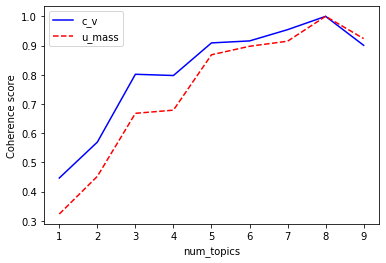

In [127]:
# Graphical Representation
u_mass_abs = list(map(abs, u_mass))
u_mass_max = max(u_mass_abs)
u_mass_esc = list(map(lambda x: x/u_mass_max, u_mass_abs))
c_v_abs =list(map(abs, c_v))
c_v_max = max(c_v_abs)
c_v_esc = list(map(lambda x: x/c_v_max, c_v_abs))
x = range(1, limit)

plt.plot(x, c_v_esc, 'b-', x, u_mass_esc, 'r--')
plt.xlabel("num_topics")
plt.ylabel("Coherence score")
plt.legend(("c_v", "u_mass"), loc='best')
plt.show()

In [ ]:
#Final LDA optimum number of topics

In [130]:
lda_model = LdaModel(corpus=corpus_tfidf, num_topics=num_topics,
                passes=5, iterations=50, id2word=dictionary)  

In [129]:
topic_info = lda_model.print_topics(num_topics=200, num_words=10)
for i, topic in enumerate(topic_info[:200]):
    print("Train topic {}: {}".format(i, topic))

Train topic 0: (0, '0.021*"believe" + 0.015*"probably" + 0.013*"members" + 0.013*"bad" + 0.012*"getting" + 0.012*"facts" + 0.012*"sad" + 0.012*"women" + 0.012*"country" + 0.012*"charge"')
Train topic 1: (1, '0.018*"hope" + 0.015*"right" + 0.014*"funny" + 0.014*"maybe" + 0.014*"agree" + 0.014*"disagree" + 0.012*"time" + 0.012*"thing" + 0.012*"money" + 0.011*"love"')
Train topic 2: (2, '0.029*"trump" + 0.019*"like" + 0.015*"president" + 0.013*"sex" + 0.012*"course" + 0.012*"america" + 0.012*"self" + 0.011*"people" + 0.011*"education" + 0.011*"comment"')
Train topic 3: (3, '0.019*"know" + 0.012*"way" + 0.012*"anti" + 0.011*"comment" + 0.010*"news" + 0.010*"wrong" + 0.010*"trump" + 0.009*"liberal" + 0.009*"canada" + 0.009*"people"')
Train topic 4: (4, '0.017*"like" + 0.016*"trump" + 0.015*"good" + 0.015*"better" + 0.015*"vote" + 0.015*"people" + 0.014*"time" + 0.011*"republican" + 0.011*"open" + 0.011*"right"')
Train topic 5: (5, '0.025*"think" + 0.016*"trump" + 0.014*"right" + 0.013*"peop

In [133]:
import pyLDAvis
import pyLDAvis.gensim

In [134]:
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.save_html(vis, "LDAVis_train.html")

C:\Users\Vicente\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


